In [5]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# Define the lyrics of the song
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [7]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

## Preprocessing the Dataset

Next, you will be generating the training sequences and their labels. As discussed in the lectures, you will take each line of the song and generate inputs and labels from it. For example, if you only have one sentence: "I am using Tensorflow", you want the model to learn the next word given any subphrase of this sentence:

```
INPUT              LABEL
-----------------------------
I             ---> am
I am          ---> using
I am using    ---> Tensorflow
```

The next cell shows how to implement this concept in code. The result would be inputs as padded sequences, and labels as one-hot encoded arrays.

In [8]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Loop over the line several times to generate the subphrases
    for i in range(1, len(token_list)):
    
        # Generate the subphrase
        n_gram_sequence = token_list[:i+1]

        # Append the subphrase to the sequences list
        input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
xs[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  2, 66],
       [ 0,  0,  0,  0,  0,  0,  4,  2, 66,  8],
       [ 0,  0,  0,  0,  0,  4,  2, 66,  8, 67],
       [ 0,  0,  0,  0,  4,  2, 66,  8, 67, 68],
       [ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 71, 40],
       [ 0,  0,  0,  0,  0,  0,  0, 71, 40, 20]], dtype=int32)

In [10]:
#See the result for the first line of the song
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
    token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


In [11]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']


In [12]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70


In [13]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [ 0  0  0  0  4  2 66  8 67 68]
decoded to text: ['in the town of athy one']
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 69


In [14]:
# Build the model
model = Sequential([
          Embedding(total_words, 64, input_length=max_sequence_len-1),
          Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

2023-01-08 21:05:56.377546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 21:05:56.478799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 21:05:56.481437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 21:05:56.485502: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16832     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500


2023-01-08 21:06:00.892333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2023-01-08 21:06:03.027105: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


15/15 [==============================] - 5s 3ms/step - loss: 5.5707 - accuracy: 0.0088  
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5505 - accuracy: 0.0243
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5085 - accuracy: 0.0287
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 5.3723 - accuracy: 0.0464
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 5.1611 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0735 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0366 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 4.9988 - accuracy: 0.0640
Epoch 9/500
15/15 [==============================] - 0s 3ms/step - loss: 4.9726 - accuracy: 0.0640
Epoch 10/500
15/15 [==============================] - 0s 3ms/step - loss: 4.9396 - accuracy: 0.0596
Epoch 11/500
15/15 

15/15 [==============================] - 0s 3ms/step - loss: 2.3128 - accuracy: 0.5453
Epoch 84/500
15/15 [==============================] - 0s 2ms/step - loss: 2.2943 - accuracy: 0.5541
Epoch 85/500
15/15 [==============================] - 0s 3ms/step - loss: 2.2571 - accuracy: 0.5695
Epoch 86/500
15/15 [==============================] - 0s 2ms/step - loss: 2.2246 - accuracy: 0.5872
Epoch 87/500
15/15 [==============================] - 0s 3ms/step - loss: 2.2001 - accuracy: 0.5806
Epoch 88/500
15/15 [==============================] - 0s 2ms/step - loss: 2.1761 - accuracy: 0.6049
Epoch 89/500
15/15 [==============================] - 0s 3ms/step - loss: 2.1507 - accuracy: 0.6049
Epoch 90/500
15/15 [==============================] - 0s 2ms/step - loss: 2.1346 - accuracy: 0.6071
Epoch 91/500
15/15 [==============================] - 0s 3ms/step - loss: 2.1112 - accuracy: 0.6115
Epoch 92/500
15/15 [==============================] - 0s 2ms/step - loss: 2.0880 - accuracy: 0.6181
Epoch 93/500


15/15 [==============================] - 0s 2ms/step - loss: 0.9561 - accuracy: 0.8720
Epoch 165/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9450 - accuracy: 0.8698
Epoch 166/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9350 - accuracy: 0.8675
Epoch 167/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9240 - accuracy: 0.8698
Epoch 168/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.8720
Epoch 169/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9040 - accuracy: 0.8720
Epoch 170/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8921 - accuracy: 0.8764
Epoch 171/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.8830
Epoch 172/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8725 - accuracy: 0.8918
Epoch 173/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.8852
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.9404
Epoch 246/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.9404
Epoch 247/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.9404
Epoch 248/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.9404
Epoch 249/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.9404
Epoch 250/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.9448
Epoch 251/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.9448
Epoch 252/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.9426
Epoch 253/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.9448
Epoch 254/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.9448
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9492
Epoch 327/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.9492
Epoch 328/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9514
Epoch 329/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9514
Epoch 330/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9514
Epoch 331/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9514
Epoch 332/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9514
Epoch 333/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9492
Epoch 334/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9514
Epoch 335/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9536
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9514
Epoch 408/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9448
Epoch 409/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9492
Epoch 410/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9514
Epoch 411/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9514
Epoch 412/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9470
Epoch 413/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9492
Epoch 414/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9492
Epoch 415/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9470
Epoch 416/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9514
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9536
Epoch 489/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9536
Epoch 490/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9492
Epoch 491/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.9470
Epoch 492/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.9492
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9514
Epoch 494/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9492
Epoch 495/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9448
Epoch 496/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1310 - accuracy: 0.9492
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9382
Epoc

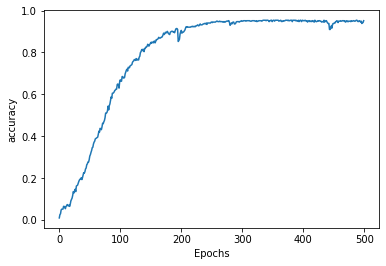

In [16]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## Generating Text

With the model trained, you can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. See how it is implemented in the code below:

In [28]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:
        
        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

Laurence went to Dublin a acres of ground up polkas mchugh suppose glisten glisten mchugh kinds of up glisten table finnertys hoops rose glisten glisten glisten leg eyes odaly mavrone away up give up give up a call nonsense nonsense cask call call suppose glisten glisten up glisten glisten three for up mchugh mchugh mchugh suppose glisten his introduction pound glisten glisten wall wall leg under up academy mchugh odaly saw odaly saw him away up a go further further phelim mchugh up suppose mchugh suppose glisten youd three up groups mchugh mchugh the ructions of ground lanigans ground up ball ball ball suppose


In [25]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Pick a random number from [1,2,3]
    choice = np.random.choice([1,2,3])

    # Sort the probabilities in ascending order 
    # and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

Laurence went to Dublin in spent man give relations weeks relations for lanigans him time give her ball to rose taras old hall meelia hall painted swore all them relations relations all nelly nelly me a rose wine for relations me me merry relations all relations and hearty groups hearty cask cask cask hearty wine jig give relations me the kerrigan fainted a one invitation rose lanigan glisten ground ground swore weeks long to me again got man the jeremy painted red again give again again relations round again in whirligig groups ground painted swore weeks weeks me relations relations cheeks lanigans time as
